In [2]:
import pandas as pd
import pymc3 as pm
import numpy as np

/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/h5py-2.7.0-py2.7-linux-x86_64.egg/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
data = pd.read_csv("../../data/concrete.csv")

In [4]:
np.array(data[data.columns[:-1]]).shape

(1030, 8)

In [5]:
with pm.Model() as model:
    
    amp = pm.Normal("amplitude", 1, 1)
    ls = [0.012, 0.012] #
    ls = pm.Normal("metric", mu=1, sd=1, shape=8) #pm.Gamma("metric", alpha=3, beta=0.5, shape=2)
    # Specify the covariance function.
    cov_func = amp * pm.gp.cov.ExpQuad(8, ls=ls) #+ pm.gp.cov.WhiteNoise(1)

    # Specify the GP.  The default mean function is `Zero`.
    gp = pm.gp.Marginal(cov_func=cov_func)

    # 
    sigma = pm.Normal("sigma", 0.1, 0.1)
    y_ = gp.marginal_likelihood("y", X=np.array(data[data.columns[0:-1]]), y=np.array(data[data.columns[-1]]), noise=sigma)

/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


In [6]:
with model:
    mp = pm.find_MAP()

/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -11,830, ||grad|| = 0.42333: 100%|██████████| 66/66 [03:59<00:00,  3.62s/it]           


In [7]:
hold = np.array(data[:1])
new_x = np.ones((1000,8))
new_x *= hold[0, :-1]
new_x[:,-1] = np.linspace(0,365, 1000)

In [8]:
import matplotlib.pyplot as plt

In [9]:
with model:
    mu, var = gp.predict(new_x, point=mp, diag=True)

/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u"'URW Bookman L'"] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


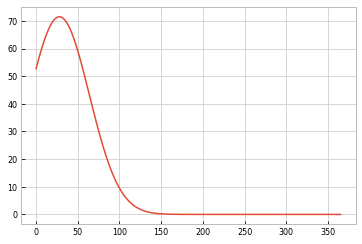

In [10]:
plt.plot(np.linspace(0,365, 1000), mu)

In [11]:
import thesis

In [12]:
np.exp(-10)

4.5399929762484854e-05

In [13]:
data.columns

Index([u'Cement (component 1)(kg in a m^3 mixture)',
       u'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       u'Fly Ash (component 3)(kg in a m^3 mixture)',
       u'Water  (component 4)(kg in a m^3 mixture)',
       u'Superplasticizer (component 5)(kg in a m^3 mixture)',
       u'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       u'Fine Aggregate (component 7)(kg in a m^3 mixture)', u'Age (day)',
       u'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [14]:
colnames = [
    "Cement\n[kg/m^3]", "Slag\n[kg/m^3]", "Fly ash\n[kg/m^3]", "Water\n[kg/m^3]", 
    "Superplasticiser [kg/m^3]", "Coarse aggregate [kg/m^3]", "Fine aggregate [kg/m^3]", "Age [days]"
           ]

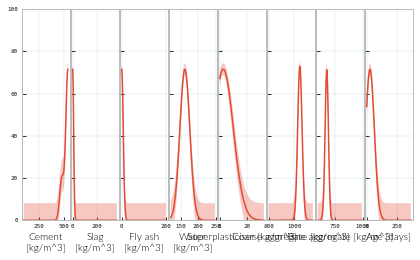

In [15]:
column = 0

f, ax = plt.subplots(1,8, sharey=True)

for column in xrange(8):

    hold = np.array(data[:1])
    new_x = np.ones((100,8))
    new_x *= hold[0, :-1]
    new_x[:,column] = np.linspace(data[data.columns[column]].min(),data[data.columns[column]].max(), 100)

    with model:
        mu, var = gp.predict(new_x, point=mp, diag=True)

    ax[column].plot(new_x[:,column], mu)
    ax[column].fill_between(new_x[:,column], mu-np.sqrt(var), mu+np.sqrt(var), alpha=0.3)
    ax[column].set_ylim([0,100])
    ax[column].set_xlabel(colnames[column])
thesis.thesisify(f)

f.subplots_adjust(wspace=0.01)